# Tesla Stock Market Prediction Model

### Introduction

In this project, I forecast Tesla’s stock prices to understand how the company’s market trends might evolve over time that helps investors, analysts, and businesses make more informed decisions. 

I used Meta’s Prophet model because it handles seasonality, trends, and irregular patterns extremely well while being simple, fast, and beginner-friendly. Although Prophet doesn't always capture sudden market shocks or complex non-linear movements, it still provides a solid baseline forecast.


The insights from this model help businesses identify potential growth periods, prepare for volatility, and plan strategies based on expected long-term trends.

In [1]:
#Importing all the necessary libraries needed for prediction and model building 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

## Exploratory Data Analysis

In [2]:
#Reading the data using Pandas library

df = pd.read_excel('Tesla Data.xlsx')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-01-07 00:00:00,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-02-07 00:00:00,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-06-07 00:00:00,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
#Converting the Date column to Date Time format

df['Date'] = pd.to_datetime(df['Date'])

In [5]:
#Checking if the data has any missing/NULL values

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [6]:
#Checking if there are any duplicates in the column.

df.duplicated().sum()

np.int64(0)

In [7]:
#Sorting the data set by Date to make accuarate over time graph visuals.

df = df.sort_values(by='Date')
df.reset_index(inplace = True, drop = True)

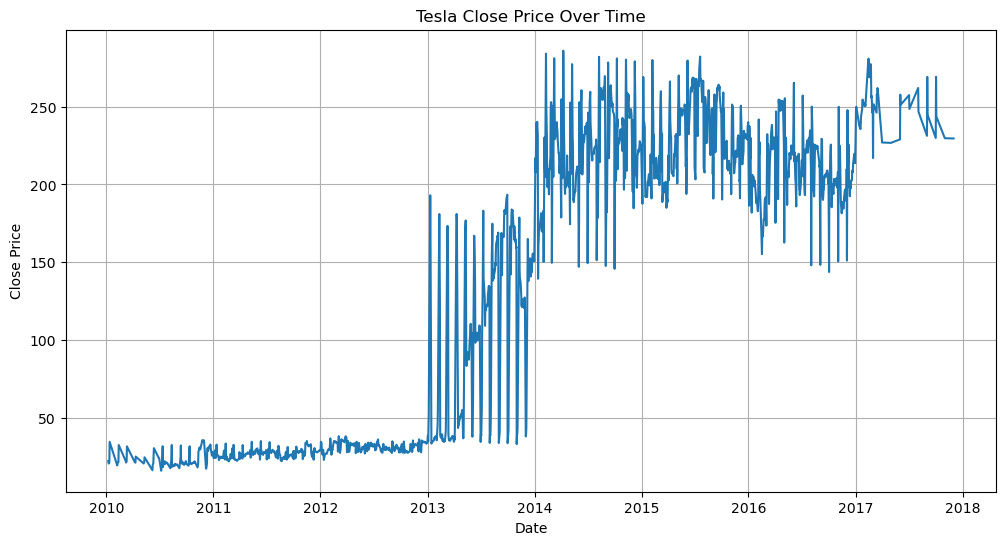

In [8]:
#Closing Price over time analysis of Tesla stocks.

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

plt.plot(df['Date'], df['Close'])
plt.title('Tesla Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)

plt.show()

## Insights

- The early period *(2009–2012)* shows a stable, low-price regime. This suggests Tesla was still in its early growth phase with limited market movement.

- Around 2013, the stock transitions into a rapid growth phase. The upward trend becomes more aggressive and sustained. 

-  Volatility increases significantly after the trend shift. While not exact seasonality, there are repeating “waves” of upward and downward oscillations.

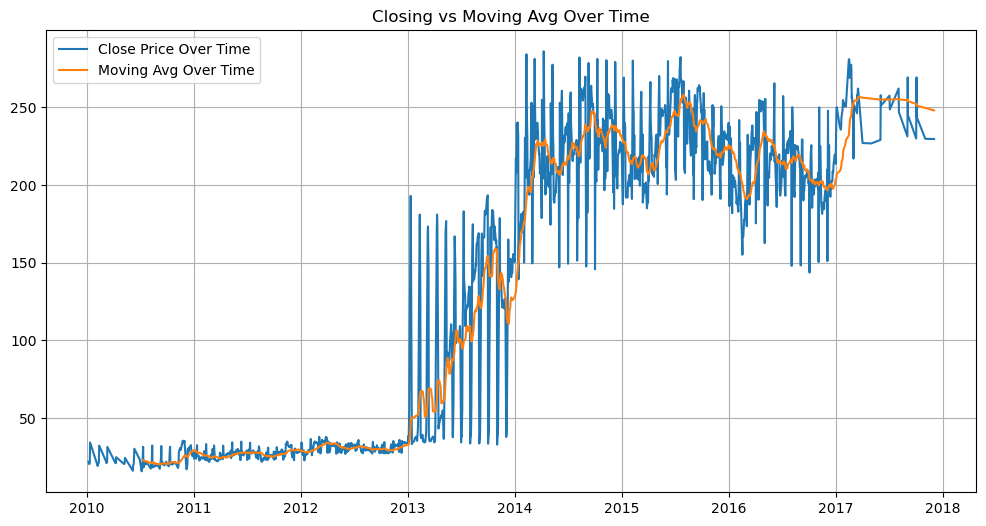

In [9]:
#Visualising Close price and Rolling Avg of Close Price for 30 days duration.

df['MovingAvg30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize = (12,6))
plt.plot(df['Date'], df['Close'], label = 'Close Price Over Time')
plt.plot(df['Date'], df['MovingAvg30'], label = 'Moving Avg Over Time')
plt.legend()
plt.grid(True)
plt.title('Closing vs Moving Avg Over Time')
plt.show()

## Insights

- This graph compares closing prices vs the moving average prices of Tesla stock. It shows that Tesla stocks over time has experienced **very high volatility**. In 2013, it witnessed massive spike and since then there is a **clear upward trend**.

- Moving Average helps to *remove the noise* of the data and smoothens the chaos. It let's us see what is the actual trend/ momentum of data. It also helps sees **shift in momentum**.

- The gap between the two lines shows periods of heightened volatility, where **investor reactions were extreme**, versus calmer stretches where the two lines move closely together. You can also observe that when the closing price repeatedly stays above the moving average, the stock is in a strong upward phase, and when it dips below, it signals temporary weakness or correction.

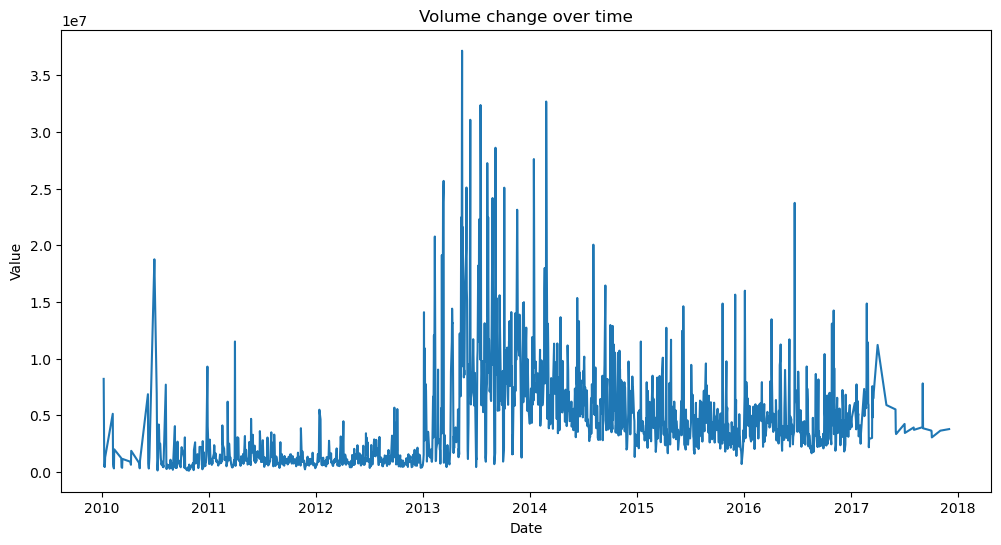

In [10]:
##Plotting the volume change over time for Tesla Stocks.

plt.figure(figsize = (12,6))
plt.plot(df['Date'], df['Volume'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Volume change over time')
plt.show()

## Insights from the Volume graph

- The sudden surge in trading volume during 2013–2014 suggests an unusual market interest, major corporate announcements or speculative trading behaviour

- This level of volume spike is not normal and usually indicates strong investor reactions, either extreme optimism, fear, or a major news cycle around Tesla.

- After the extreme volatility burst, volume becomes more stable, less spiky and more consistent over time. This often signals the stock moved from a “speculative phase” into a more stable growth phase and long-term holding behaviour increased.

- Volume peaks align with major changes in price direction, making volume a strong candidate as a leading indicator in the forecasting model.

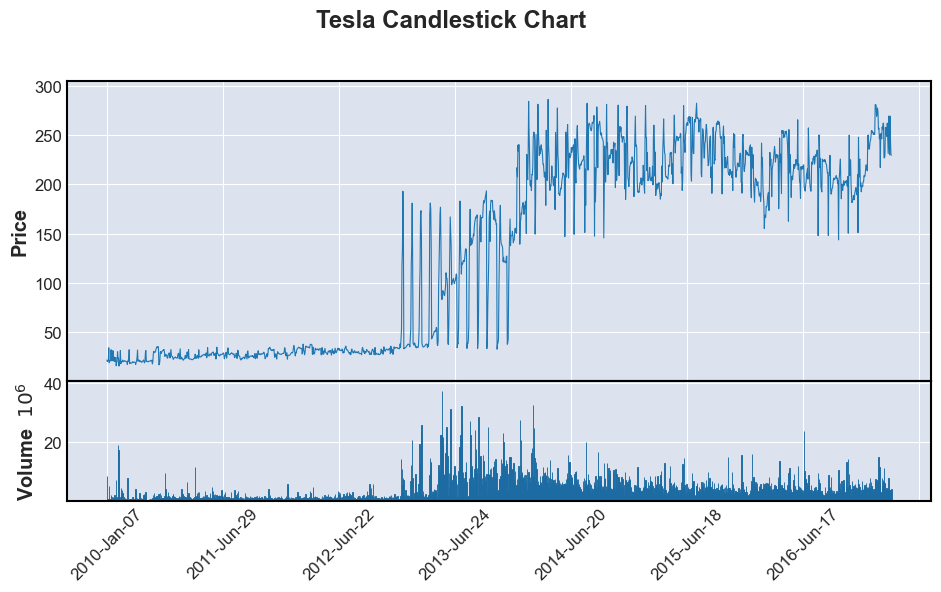

In [11]:
import mplfinance as mpf

df_line = df.set_index('Date')[['Open', 'High', 'Low', 'Close', 'Volume']]
mpf.plot(df_line, type='line', volume=True, figsize=(12,6),
         title='Tesla Candlestick Chart')

## Insights

- From the graph, Tesla’s trading volume stays relatively low and stable until early 2013. After 2013, there is a sharp, noticeable spike in trading volume, which continues for several months.

- In technical analysis, a **price jump supported by high volume** is seen as a reliable trend indicator.

- This aligns with the period when Tesla’s stock price rose rapidly due to major events such as strong quarterly earnings, increased media coverage and investor confidence, growing optimism around electric vehicles etc.

- Because of these events, more **investors entered the market**, creating high trading activity.

- After this intense activity phase, the **volume gradually declines and stabilizes**. This can indicate - Investors began holding Tesla stock for long-term, expecting future growth
The market settled after the initial hype.
Trading activity normalized as Tesla became a more established company.

- As volume declines after the peak period, it becomes smoother and more predictable. It is a clear sign of **Market Stabilization**.

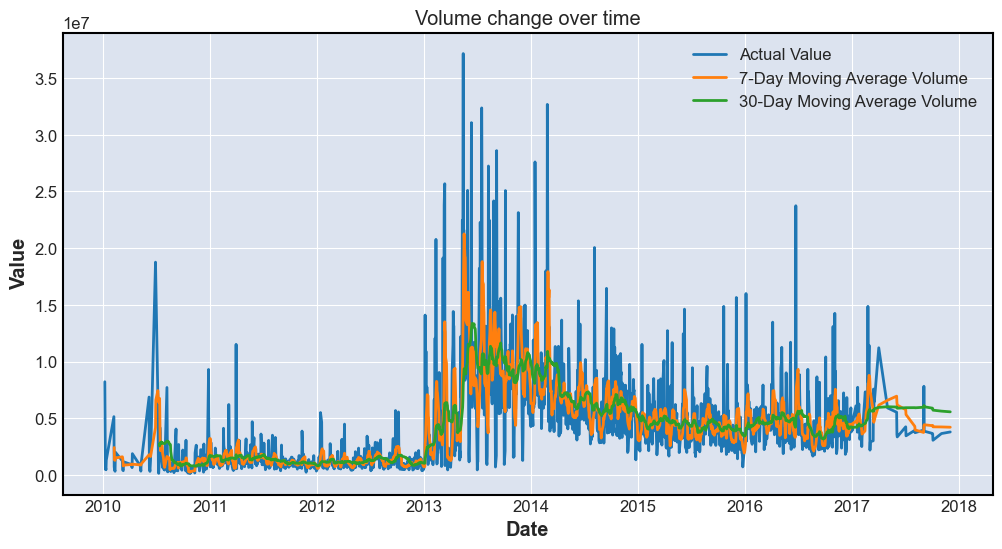

In [23]:
df['MA Volume 7'] = df['Volume'].rolling(window = 7).mean()
df['MA Volume 30'] = df['Volume'].rolling(window = 30).mean()

plt.figure(figsize = (12,6))
plt.plot(df['Date'], df['Volume'], label = 'Actual Value')
plt.plot(df['Date'], df['MA Volume 7'], label = '7-Day Moving Average Volume')
plt.plot(df['Date'], df['MA Volume 30'], label = '30-Day Moving Average Volume')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.title('Volume change over time')
plt.show()

## Insights

- The 30-day moving average shows a clear transition from hype to stability.
  
- From 2013 onward, the 30-day MA rises sharply, then gradually declines and flattens again after 2015, reflecting Tesla’s evolution from a speculative stock to a more stable, widely-held company.

- Whenever the blue “Actual Value” line jumps far above both moving averages (especially in 2013–2014), it indicates sudden market reactions to major news, earnings reports, or announcements.

- Post-2015 decreasing volume averages suggest growing long-term investor confidence.

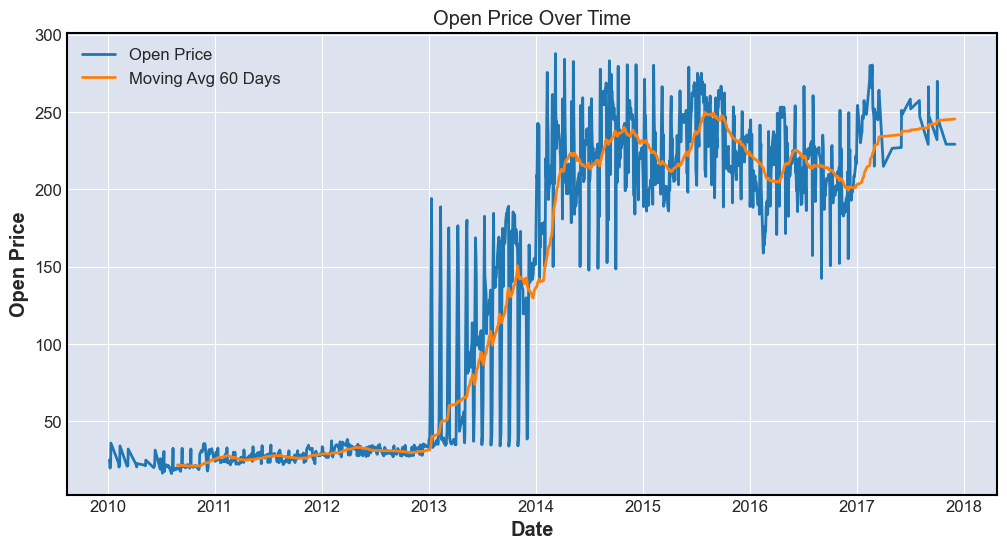

In [13]:
df['MA 60'] = df['Open'].rolling(window = 60).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Open'], label = 'Open Price')
plt.plot(df['Date'], df['MA 60'], label = 'Moving Avg 60 Days')
plt.legend()
plt.title('Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.show()

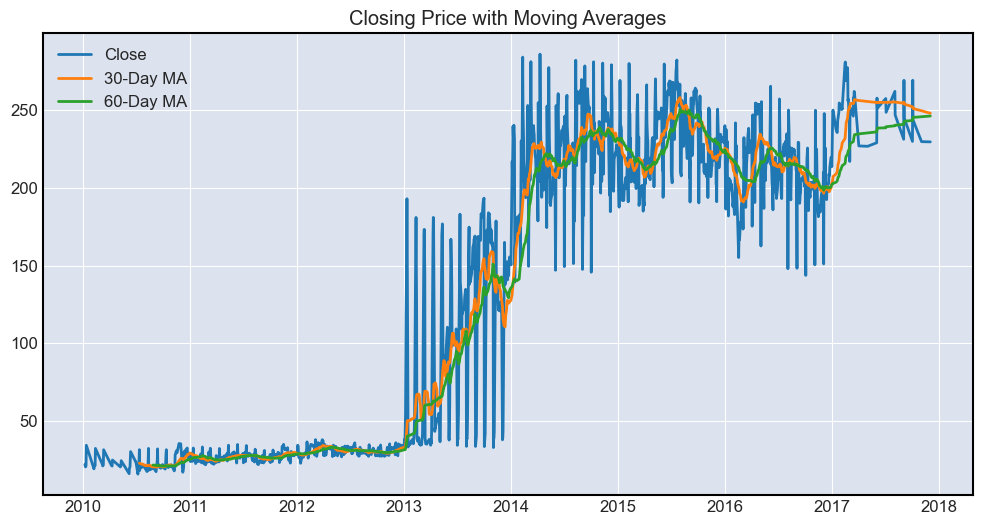

In [14]:
df['MA 60'] = df['Close'].rolling(window = 60).mean()
df['MA 30'] = df['Close'].rolling(window = 30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA 30'], label='30-Day MA')
plt.plot(df['Date'], df['MA 60'], label='60-Day MA')
plt.legend()
plt.title('Closing Price with Moving Averages')
plt.grid(True)
plt.show()

## Insights from the “Open Price Over Time” graph

- This plot shows that the stock went through a massive structural shift around 2013, where the market sentiment clearly flipped from slow and sideways to full-blown upward momentum.

- The price volatility explodes post-2013, meaning traders weren’t just watching the stock — they were actively reacting to news, hype, or some major change in fundamentals.

- The 60-day moving average and the price action shows that the long-term trend wasn’t random noise; it reflects genuine, sustained buying pressure from institutions.

- The fact that price candles stay above the moving average most of the time tells investors the asset was in a strong bullish regime for years.

- And lastly, the clean upward drift in the moving average shows the stock wasn’t just spiking, it was maturing, stabilizing, and gaining long-term confidence from the market, which is exactly the narrative investors love.

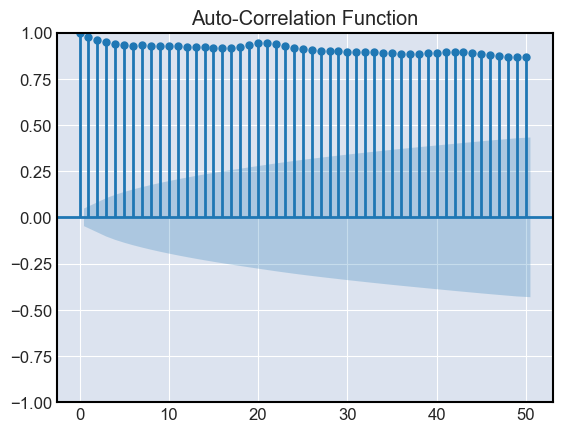

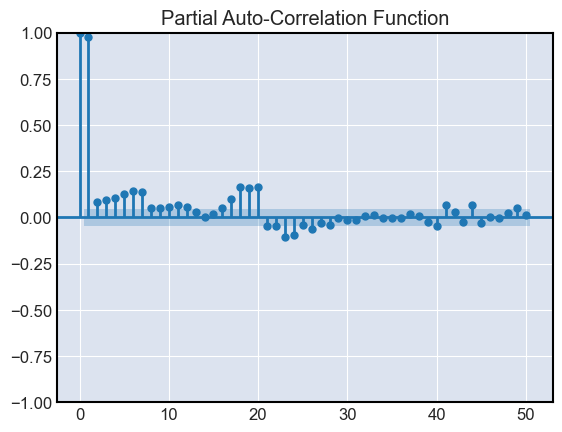

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'], lags = 50)
plt.title('Auto-Correlation Function')
plt.show()

plot_pacf(df['Close'], lags = 50)
plt.title('Partial Auto-Correlation Function')
plt.show()

## Insights

- ACF is used to know “How much does the data today depend on data from earlier days?”. PACF tells us "How much does today depend SPECIFICALLY on yesterday, without other lags interfering?”. ACF/PACF show if the data is stationary or trending.

- We plot ACF(Auto-Correlation Function) and PACF(Partial Auto-Correlation Function) plot to understand what the data is trying to tell. It tells if the data is stationary or has a trend or not.

- The ACF plot is decaying slowly which indicates that there is a strong trend in the data. The data heavily depends on its recent past. PACF often shows: One big spike at lag 1, then suddenly drops. This means that today’s price depends a LOT on yesterday’s price.

- Financial data is noisy, has sudden drops, follows no fixed seasonality

So ACF/PACF help you judge:
“Is this dataset even predictable?”. So, How do we know if prediction is difficult? We can understand this if the ACF shows irregular spikes, no clear pattern, high volatility.

- Prophet can help model the trend, seasonality, holidays but plotting ACF and PACF helps understand if Prices rely heavily on previous day prices or if there is a sudden shock or shift in the data.

- No strong seasonality spikes are visible in either ACF or PACF at 7-day or 30-day intervals, which aligns with the fact that stock markets don’t follow clean, recurring patterns.

- These patterns validate the use of Prophet, which is designed for non-stationary series with trend components, instead of traditional ARIMA models that require strict stationarity.

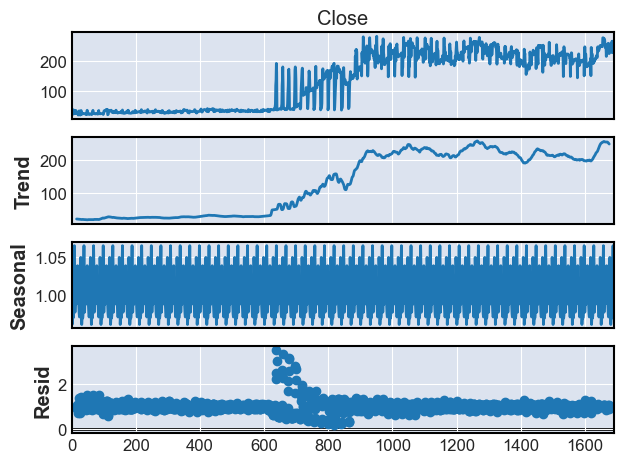

In [16]:
decomposition = seasonal_decompose(df['Close'], model = 'multiplicative', period = 30)
fig = decomposition.plot()
plt.show()

## Insights

- Tesla’s closing price shows a strong upward movement with sharp volatility spikes, indicating rapid market reactions during certain periods.

- The long-term trend rises steadily, reflecting growing investor confidence and the company’s expanding market value over time.

- Residuals cluster heavily around certain time points, suggesting periods where the model struggles due to sudden market shocks or unpredictable price swings.

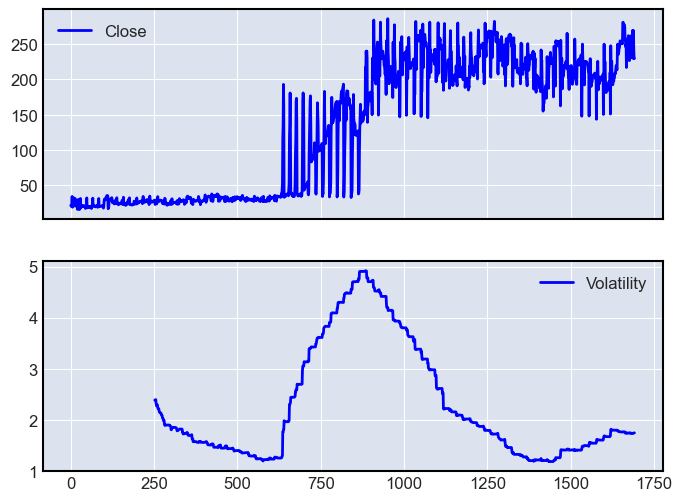

In [17]:
# Volatility Analysis
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=252).std() * np.sqrt(252)

df[['Close', 'Volatility']].plot(subplots=True, color='blue', figsize=(8, 6))
plt.show()

## Insights about Volatility

- From around the mid-dataset onwards, the stock’s price shoots up sharply and volatility rises just before and during this growth phase.
This shows that the price increases were driven by uncertainty, news shocks, or rapid investor activity.

- Whenever the Close price moves in a steady sideways pattern, volatility collapses into a low, flat line. This tells you the market moved from a “high-uncertainty regime” to a “stable regime.”

- Volatility peaks act as early warnings for upcoming trend reversals or major movements.

- Every time volatility hits a peak or starts rising again, the price direction changes right after it. 

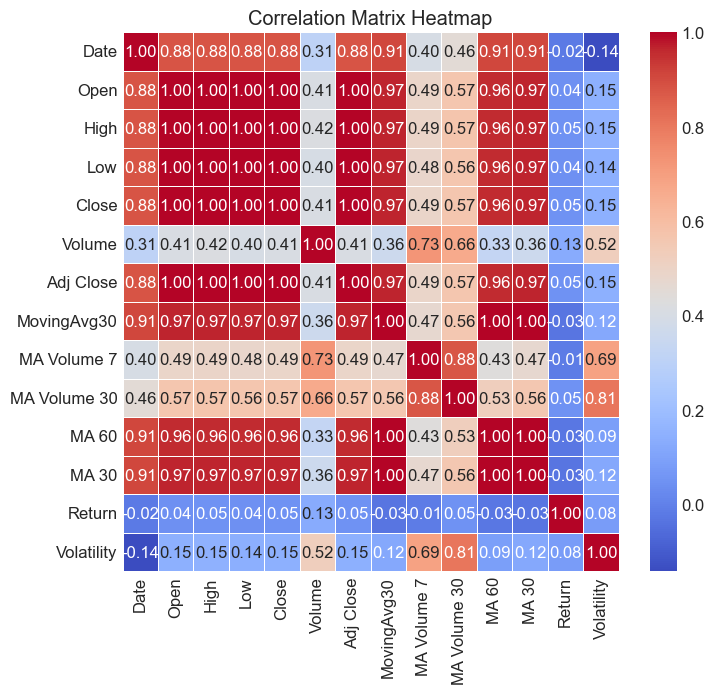

In [18]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Insights

- Volume barely correlates with price, meaning Tesla’s price movements often happen independently of trading activity.
  
- Volatility operates separately from the main price trends indicating that sudden shocks, not regular price movement—drive volatility spikes.

- Moving Average of 60 days shows the strongest correlation with price → long-term trends dominate this stock’s behavior.

- Price metrics (Open, High, Low, Close, Adj Close) are nearly 100% correlated, meaning the stock moves uniformly. This shows the stock behaves very predictably across all price points, which is great for forecasting models and indicates low intraday volatility risk for traders.

## Preparing the Model

In [19]:
df_prophet = df.reset_index()[['Date', 'Close']]
df_prophet.rename(columns = {'Date' : 'ds', 'Close': 'y'}, inplace = True)
df_prophet.head()

,ds,y
0,2010-01-07,21.959999
1,2010-01-09,20.450001
2,2010-01-10,20.600000
3,2010-01-11,21.410000
4,2010-01-12,34.349998


### Note:

Prophet expects the input data in a very specific format.
It won’t run unless we give it exactly:
- ds → the date column (datetime)
- y → the target value you want to forecast

It uses 'ds' to automatically detect trends, seasonality, cycles, changepoints.

Close price is the industry standard for forecasting because it reflects the final consensus value of the trading day.
It is the industry standard for forecasting and forms the basis of most financial indicators.


08:08:36 - cmdstanpy - INFO - Chain [1] start processing
08:08:38 - cmdstanpy - INFO - Chain [1] done processing


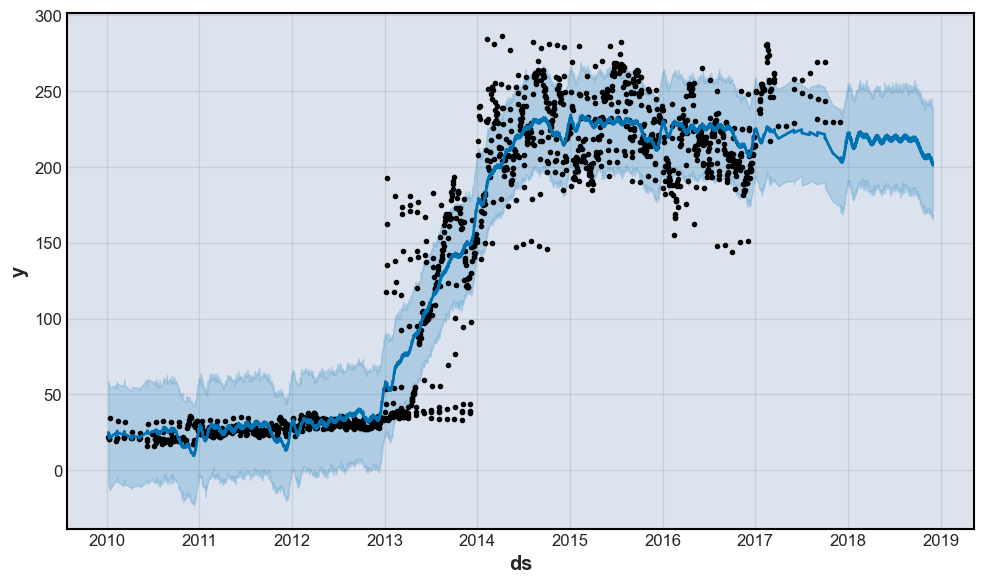

In [20]:
model = Prophet(daily_seasonality = False)
model.fit(df_prophet)

future = model.make_future_dataframe(periods = 365)

forecast = model.predict(future)
model.plot(forecast)
plt.show()

## Future Forecast about Tesla stocks.

- The stock may not show strong upward movement in the coming year.

- The forecast shows a slight downward slope, meaning Prophet expects a mild decline or stabilization in prices.

- The future price is expected to stay within the shaded confidence band, not explode upwards.

- Despite volatility, the forecast suggests Tesla entering a more mature phase with moderated price swings over the next year.

- It tells you the most expected value (blue curve), the upper limit (best-case scenario), the lower limit (worst-case scenario).
This is helpful for risk assessment, investment decision-making, understanding volatility.

Note: Stock Market data don't have Saturday and Sunday's. Since those days market remains close. But, these are not missing values, and since we are using FBProphet, it doesn't care about this values. If we use ARIMA model for Time Series Forecasting then we may have to impute the value for Saturday and Sunday as well.

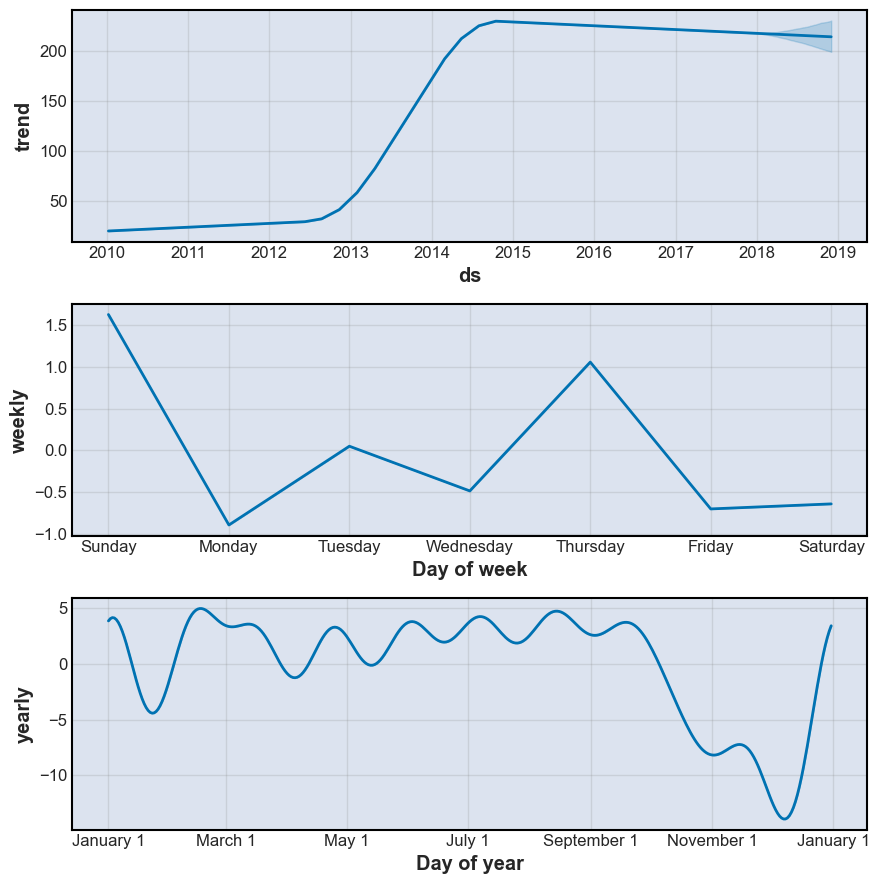

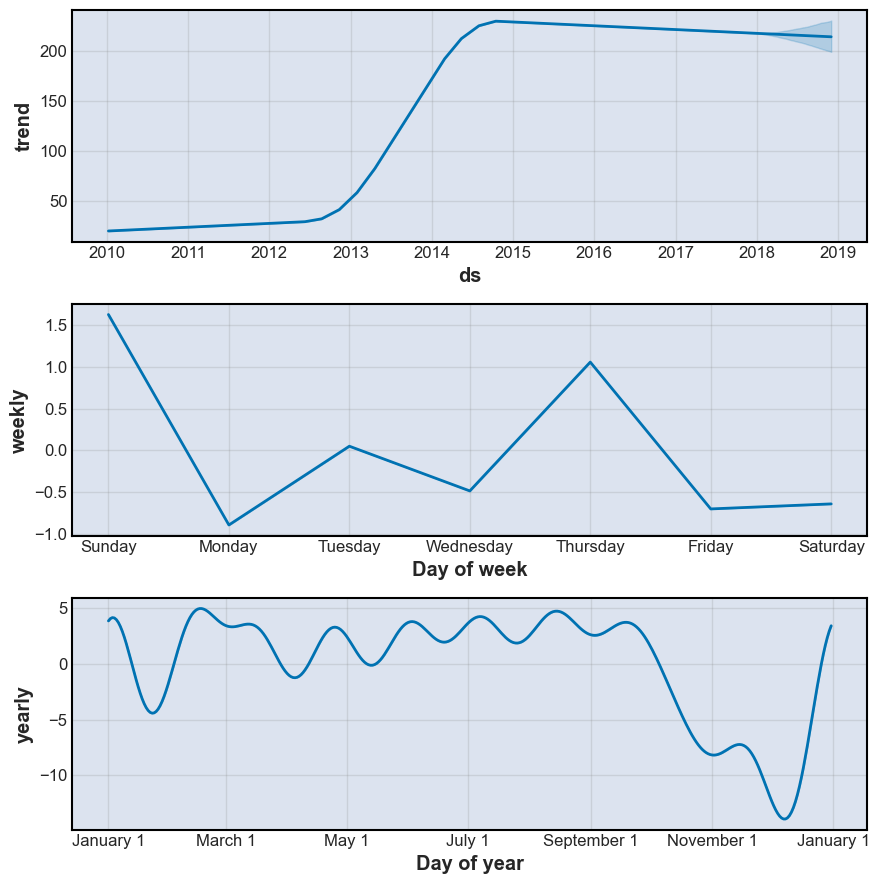

In [21]:
model.plot_components(forecast)

## Insights 

- The long-term trend shows a surge around 2013–2014, marking Tesla’s transition from slow early growth to rapid large-scale market expansion.

- Mondays show the sharpest dip in prices, implying lower investor sentiment at the start of the week, while Sundays and Thursdays tend to be the strongest days.

- The stock exhibits recurring yearly peaks around early spring and mid-summer, while late November to December consistently shows weaker performance.

- 